## 1. DEFINE

In [56]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

## 2. DISCOVER

In [61]:
path = 'C:\\GitBird Projects'
os.chdir(path)

In [62]:
#Load data
data = pd.read_csv('DataSet/training_set_data.csv')
data.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,...,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id
0,1,45,citizen_birth,native_born,15,908.0,62.0,800.0,11.0,35.0,...,English,0,0,0,0,0,1,0,0,1
1,2,47,citizen_birth,native_born,50,180499.0,49.0,160007.0,20424.0,19.0,...,English,0,0,0,0,0,1,0,0,1
2,4,26,citizen_birth,native_born,0,7367.0,93.0,4.0,20.0,7250.0,...,English,0,0,1,0,0,0,0,0,2
3,5,42,citizen_naturalized,foreign_born,0,22970.0,51.0,46.0,283.0,22590.0,...,Korean,0,1,0,0,0,0,0,0,3
4,6,79,citizen_naturalized,foreign_born,0,7941.0,23.0,94.0,73.0,7751.0,...,Korean,0,1,0,0,0,0,0,0,3


In [63]:
#Checking if any of the columns has null values
data.isnull().sum()

person_id                0
age                      0
citizen_status           0
nativity_status          0
weekly_hours_worked      0
total_income             0
self_employed_income     0
wage_income              0
interest_income          0
other_income             0
marital_status           0
school_status            0
sex                      0
when_last_worked         0
worked_last_week         0
language                 0
race_native_american     0
race_asian               0
race_black               0
race_native_hawaiian     0
race_pacific_islander    0
race_white               0
race_other               0
uninsured                0
household_id             0
dtype: int64

In [64]:
#Checking if any of the row has duplicated values
data.duplicated().sum()

0

#### Data Cleaning and Normalization

In [65]:
# Checking unique values for feature: sex
data.sex.unique()

array(['FEMALE', 'MALE', 'male', 'female', 'M', 'F'], dtype=object)

In [66]:
data = data.replace(['FEMALE','female','Female'],'F')
data = data.replace(['MALE', 'male', 'Male'],'M')
data.sex.unique()

array(['F', 'M'], dtype=object)

In [67]:
#Converting Nominal Category to Boolean for feature: Uninsured 
data.uninsured = data.uninsured.astype(int)

In [68]:
#Combining all races into one feature
data.loc[data['race_native_american'] == 1,'race_other'] = 1
data.loc[data['race_native_hawaiian'] == 1,'race_other'] = 1
data.loc[data['race_pacific_islander'] == 1,'race_other'] = 1
data.race_other.unique()

array([0, 1], dtype=int64)

In [69]:
#Removing columns that are not relevant to modeling
data2= data.drop(['person_id','race_native_american', 'race_native_hawaiian', 'race_pacific_islander', 
                  'household_id','language','self_employed_income','wage_income','interest_income',
                  'other_income','nativity_status','when_last_worked', 'worked_last_week'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59597 entries, 0 to 59596
Data columns (total 12 columns):
age                    59597 non-null int64
citizen_status         59597 non-null object
weekly_hours_worked    59597 non-null int64
total_income           59597 non-null float64
marital_status         59597 non-null object
school_status          59597 non-null object
sex                    59597 non-null object
race_asian             59597 non-null int64
race_black             59597 non-null int64
race_white             59597 non-null int64
race_other             59597 non-null int64
uninsured              59597 non-null int32
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 5.2+ MB


#### Checking UnInsured vs Insured data

In [70]:
data['uninsured'].value_counts()

0    54977
1     4620
Name: uninsured, dtype: int64

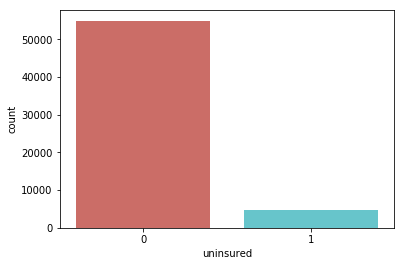

In [73]:
sns.countplot(x='uninsured',data=data, palette='hls')
plt.savefig('Outcome/count_plot')
plt.show()

In [74]:
uninsured_pct =round(len(data[data['uninsured']==1])/len(data)*100,2)
print("Percentage of Uninsured people:",uninsured_pct)
print("Percentage of Insured people  :",100-uninsured_pct)

Percentage of Uninsured people: 7.75
Percentage of Insured people  : 92.25


From above we can see that the data provided is imbalanced. 92% of the data is of Insured people while 8% is uninsured.
This will lead to false result if we model the data the way it is. 
Hence, we will use the smote method for synthetic sampling of data so we have almost similar number of both data

In [14]:
data2.groupby('marital_status').mean()

,age,weekly_hours_worked,total_income,race_asian,race_black,race_white,race_other,uninsured
marital_status,,,,,,,,
divorced,55.533848,25.295596,40660.569339,0.015938,0.144758,0.818436,0.034341,0.079691
married,52.593895,27.271456,52974.486989,0.057519,0.058207,0.853810,0.041411,0.055048
never_married,33.379870,25.537752,25077.792064,0.051924,0.198348,0.710047,0.061573,0.120010
separated,49.558333,26.716667,33246.575000,0.026190,0.258333,0.625000,0.102381,0.157143
widowed,75.947535,6.282487,33483.520282,0.023561,0.135536,0.828516,0.017731,0.061453


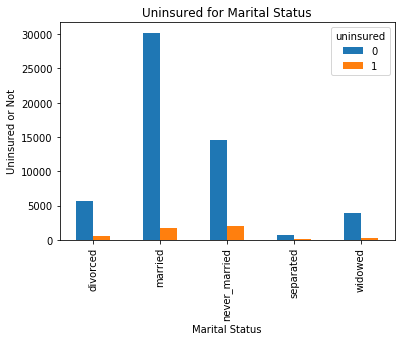

In [75]:
%matplotlib inline
pd.crosstab(data2.marital_status,data2.uninsured).plot(kind='bar')
plt.title('Uninsured for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Uninsured or Not')
plt.savefig('Outcome/uninsured_marital_status')

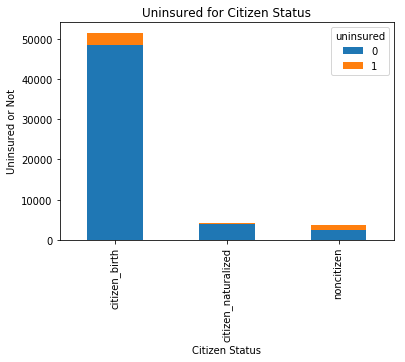

In [77]:
%matplotlib inline
pd.crosstab(data2.citizen_status,data2.uninsured).plot(kind='bar', stacked=True)
plt.title('Uninsured for Citizen Status')
plt.xlabel('Citizen Status')
plt.ylabel('Uninsured or Not')
plt.savefig('Outcome/uninsured_citizen_status')

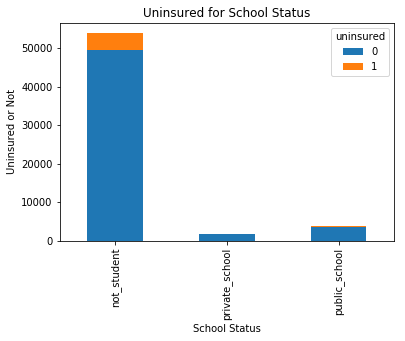

In [78]:
%matplotlib inline
pd.crosstab(data2.school_status,data2.uninsured).plot(kind='bar', stacked=True)
plt.title('Uninsured for School Status')
plt.xlabel('School Status')
plt.ylabel('Uninsured or Not')
plt.savefig('Outcome/uninsured_school_status')

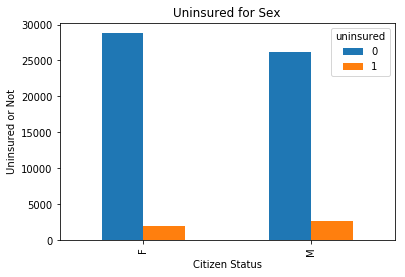

In [79]:
%matplotlib inline
pd.crosstab(data2.sex,data2.uninsured).plot(kind='bar')
plt.title('Uninsured for Sex')
plt.xlabel('Citizen Status')
plt.ylabel('Uninsured or Not')
plt.savefig('Outcome/uninsured_sex')

#### Encoding the labels 
We need to convert nominal categorical variables to numeric so the machine can read it and model.
Using __[LabelEncoder from sklearn](https://www.datacamp.com/community/tutorials/categorical-data)__

In [80]:
data2_copy =data2.copy()
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data2_copy['citizen_status'] = lb_make.fit_transform(data2_copy['citizen_status'])
data2_copy['marital_status'] = lb_make.fit_transform(data2_copy['marital_status'])
data2_copy['school_status'] = lb_make.fit_transform(data2_copy['school_status'])
data2_copy['sex'] = lb_make.fit_transform(data2_copy['sex'])

#### Correlation Data analysis

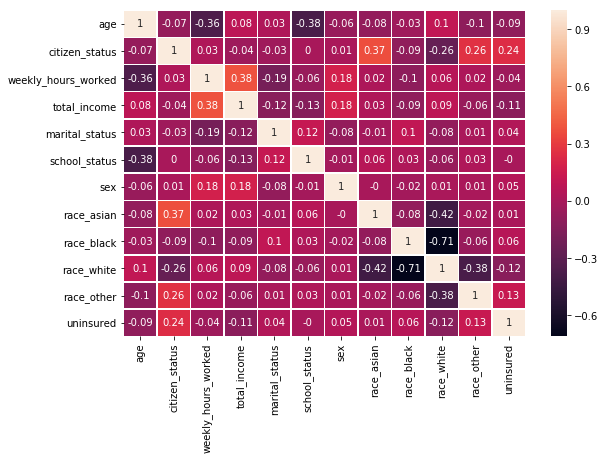

In [83]:
corr = data2_copy.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(round(corr,2), annot =True,linewidths=.5, ax=ax)
plt.savefig('Outcome/correlation_plot')
plt.show()


* Race White and Race Black are higly negatively correlated
* Race White and Race Asian are also negatively correlated
* Race White and Race Other are slightly negaitively correlated
* School Status and Age are slightly negatively correlated
* Weekly Hours worked and Age are negatively correlated

Let us drop Race White since it correlates with many other features

In [84]:
data2_copy= data2_copy.drop(['race_white'], axis=1)
data2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59597 entries, 0 to 59596
Data columns (total 11 columns):
age                    59597 non-null int64
citizen_status         59597 non-null int64
weekly_hours_worked    59597 non-null int64
total_income           59597 non-null float64
marital_status         59597 non-null int64
school_status          59597 non-null int64
sex                    59597 non-null int64
race_asian             59597 non-null int64
race_black             59597 non-null int64
race_other             59597 non-null int64
uninsured              59597 non-null int32
dtypes: float64(1), int32(1), int64(9)
memory usage: 4.8 MB


#### Creating and Training Logistic Regression Model

In [85]:
# Separate input features and target
y = data2_copy.uninsured
X = data2_copy.drop('uninsured', axis=1)

# setting up testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
columns = X_train.columns

### SMOTE

Using __[SMOTE](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)__ to deal with Imbalanced data

In [86]:
#Oversampling only training data 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(data=X_train,columns=columns)
y_train = pd.DataFrame(data=y_train,columns=['uninsured'])
y_train.tail()

# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train))
print("Number of uninsured in oversampled data",len(y_train[y_train['uninsured'] == 1]))
print("Number of insured",len(y_train[y_train['uninsured'] == 0]))
print("Proportion of uninsured in oversampled data is ",len(y_train[y_train['uninsured'] == 1])/len(X_train))
print("Proportion of insured in oversampled data is ",len(y_train[y_train['uninsured'] == 0])/len(X_train))


C:\Users\adhewaju\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


length of oversampled data is  82496
Number of uninsured in oversampled data 41248
Number of insured 41248
Proportion of uninsured in oversampled data is  0.5
Proportion of insured in oversampled data is  0.5


## 3. DEVELOP 

#### Implementing logistic Regression Model

In [87]:
from sklearn.linear_model import LogisticRegression
#Fitting logistic  regression model
model = LogisticRegression(solver='lbfgs')
model = model.fit(X_train,y_train.values.ravel())

In [88]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.239645
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.121     
Dependent Variable:  uninsured         AIC:               28584.3037
Date:                2019-08-25 18:53  BIC:               28674.2573
No. Observations:    59597             Log-Likelihood:    -14282.   
Df Model:            9                 LL-Null:           -16250.   
Df Residuals:        59587             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                 -0.0394   0.0007 -58.9640 0.0000 -0.0407 -0.0381
citizen_status       0.9047 

## 4. DEPLOYMENT

#### Predict Class Probabilities & Class Predictions
We can make these two predictions:
1. Hard Predictions: Using the predict() will output the class predictions
2. Soft Predictions: Using the predict_proba() will output class probabilites

**Hard Prediction (Class Label)**

Class Labels:
- Negative class is 0
- Positive class is 1

In [89]:
# Make class label predictions
y_pred = model.predict(X_test)
print("First y_pred: ",y_pred[:10])
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(model.score(X_test, y_test)))

First y_pred:  [1 0 0 0 0 1 0 0 0 1]
Accuracy of logistic regression classifier on test set: 0.76


**Soft Prediction (Probability Scores)**

Class Probabilities:
- First column is the predicted probability of individual being insured 
- Second column is the predicted probability of individual being uninsured

In [90]:
#Make class probability predictions
model.predict_proba(X_test)[:10]

array([[0.47898971, 0.52101029],
       [0.77722061, 0.22277939],
       [0.82229424, 0.17770576],
       [0.53467072, 0.46532928],
       [0.95827488, 0.04172512],
       [0.43791488, 0.56208512],
       [0.86114373, 0.13885627],
       [0.75558558, 0.24441442],
       [0.61629236, 0.38370764],
       [0.37711931, 0.62288069]])

### Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10626  3103]
 [  463   708]]


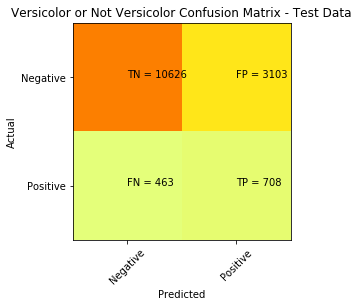

In [92]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.savefig('Outcome/confusion_matrix')
plt.show()

#### Interpretation

People who are uninsured and were correctly identified as uninsured were 706
People who are insured and were correctly identified as insured were 10656

* Correct Predictions: TP+TN = (706+10656) = 11362

People who are uninsured but were incorrectly identified as insured were 465
People who are insured but were correctly identified as uninsured were 3073

* InCorrect Predictions: FN+FP = (465+3073) = 3538
-------------------------------------------------------------------------------

* Sensitivity(Recall) = TP/(TP+FN) = 706/(706+465) = 0.94 

94% people who were uninsured were correctly identified as uninsured by the Logistic Regression model.

* Specificity         = TN /(TN+FP)= 10656/(10656+3073) = 0.78

78% people who were insured were correctly identified as insured by the Logistic Regression model. 

**The goal of the business is to correctly identify people who are uninsured so we can reach out to people who are uninsured for marketing purposes.** So we need to focus more on Sensitivity. If there is another model with more sensitivity then we can opt to choose that model instead of this one.

--------------------------------------------------------------------------------
* Precision  = TP/(TP+FP) = 706/(706+3073) = 0.19

Precision is proportion of positive results that were correctly classified. i.e. ability to not label a sample as insured if it is uninsured. 19% correct classification were of uninsured people. Precision is helpful only when extreme scenario occurs 

* Recall = TP/(TP+FN) = 706/(706+465)= 0.60

Recall is proportion of correctly classified positive result over actual positive results. Of the actual uninsured, 60% of them were actually classified as uninsured.


In [93]:
from sklearn.metrics import classification_report
target_names = ['insured', 'uninsured']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    insured       0.96      0.77      0.86     13729
  uninsured       0.19      0.60      0.28      1171

avg / total       0.90      0.76      0.81     14900



**Interpretation:** Of the entire test set, 76% of the uninsured were rightly identified.

### ROC Curve

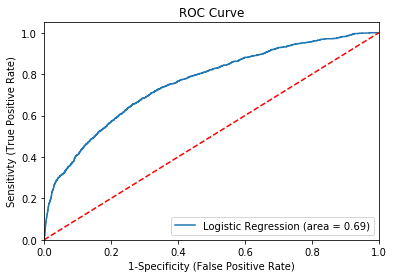

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivty (True Positive Rate)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Outcome/Log_ROC')
plt.show()

**Interpretation**

From the ROC Curve:

I have to accept 20% false positive rate with 60% true positive rate or to accept 40% false positive rate with 76% true positive rate.  For the business it is inevitable to find people who are uninsured. So I would choose the latter. Marketing insurance to already insured people would not hurt.

AUC is 69%. If we were to compare this model with another model with higher AUC, we would choose other graph for better accuracy

### Predicting Unlabeled data
Now we read new file with people info.The new data don't have uninsured or not data. So we predict if the people are not insured or not. Also we add predicting probabilities of the result. 

In [98]:
#Reading, cleaning new data
unlabeled_data = pd.read_csv('DataSet/unlabeled_data.csv')
unlabeled_data = unlabeled_data.dropna()

#Making the result uniform
unlabeled_data = unlabeled_data.replace(['FEMALE','female','Female'],'F')
unlabeled_data = unlabeled_data.replace(['MALE', 'male', 'Male'],'M')
unlabeled_data.loc[data['race_native_american'] == 1,'race_other'] = 1
unlabeled_data.loc[data['race_native_hawaiian'] == 1,'race_other'] = 1
unlabeled_data.loc[data['race_pacific_islander'] == 1,'race_other'] = 1
#Dropping features that were not 
unlabeled_data2= unlabeled_data.drop(['person_id','race_native_american', 'race_native_hawaiian', 'race_pacific_islander', 
                  'race_white','household_id','language','self_employed_income','wage_income','interest_income',
                  'other_income','nativity_status','when_last_worked', 'worked_last_week'], axis=1)

#Encode Categorical Data
unlabeled_data2['citizen_status'] = lb_make.fit_transform(unlabeled_data2['citizen_status'])
unlabeled_data2['marital_status'] = lb_make.fit_transform(unlabeled_data2['marital_status'])
unlabeled_data2['school_status'] = lb_make.fit_transform(unlabeled_data2['school_status'])
unlabeled_data2['sex'] = lb_make.fit_transform(unlabeled_data2['sex'])

#Use the model to predict if uninsured or not 
# and the probablity of predicting it 
unlabeled_pred_y=model.predict(unlabeled_data2)
unlabeled_score=model.score(unlabeled_data2, unlabeled_pred_y)
unlabeled_prob=model.predict_proba(unlabeled_data2)[:,1] #Just getting probablity for getting uninsured 


unlabeled_data['Predicted_uninsured'] = unlabeled_pred_y
unlabeled_data['Prediction_prob'] = unlabeled_prob

#Adding uninsured or not and preidiction probablity to new file
unlabeled_data.to_csv('Outcome/Predicted_Unlabeled_data.csv')